In [1]:
projPath_load= '/home/alvaro/notebook/jupyterenv/bin/TFM/22-23_Maniobres-20221022T161922Z-001/22-23_Maniobres/data/interim/'

In [2]:
projPath_load_data = '/home/alvaro/notebook/jupyterenv/bin/TFM/CODIGO/test_tfm_code_test/'

In [3]:
projPath_save='/home/alvaro/notebook/jupyterenv/bin/TFM/CODIGO/test_tfm_code_test/'

In [4]:
month = '202206'
darsena = '_DM'

In [5]:
buffer_basin = 20 #m
buffer_dock = 30 #m
buffer_basin1 = 150 #m

min_points = 10

In [6]:
import numpy as np
import pandas as pd

import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
%matplotlib notebook

In [8]:
moll_map = gpd.read_file('/home/alvaro/notebook/jupyterenv/bin/TFM/22-23_Maniobres-20221022T161922Z-001/22-23_Maniobres/data/maps/MollsDarsenaMorrot_noTalo.shp')
dm_map = gpd.read_file('/home/alvaro/notebook/jupyterenv/bin/TFM/22-23_Maniobres-20221022T161922Z-001/22-23_Maniobres/data/maps/DarsenaMorrot.shp')

In [9]:
dm_map.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
dm_buffer = gpd.GeoDataFrame(geometry = dm_map.to_crs(32631).buffer(buffer_basin).to_crs(4326))
dm_buffer.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
dm_buffer_z2 = gpd.GeoDataFrame(geometry = dm_map.to_crs(32631).buffer(buffer_basin1).to_crs(4326))
dm_buffer_z2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
moll_buffer = gpd.GeoDataFrame(geometry = moll_map.to_crs(32631).buffer(buffer_dock, cap_style = 2,join_style = 2).to_crs(4326))

<IPython.core.display.Javascript object>


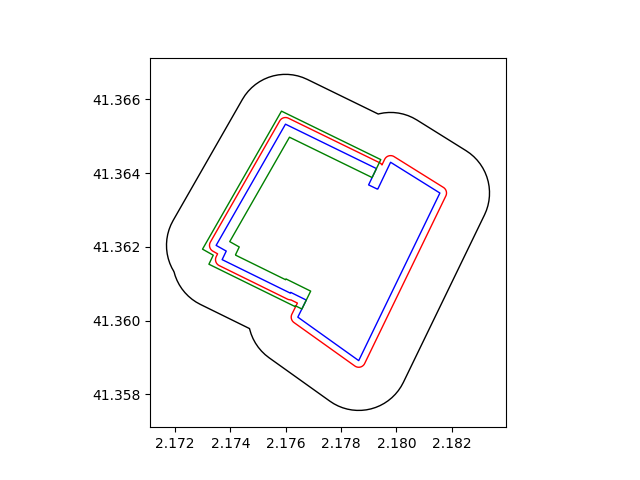

<AxesSubplot:>

In [13]:
fig, ax = plt.subplots()
dm_map.plot(ax = ax, fc = 'none', ec = 'blue')
dm_buffer.plot(ax = ax, fc = 'none', ec = 'red')
moll_buffer.plot(ax = ax, fc = 'none', ec = 'green')
dm_buffer_z2.plot(ax = ax, fc = 'none', ec = 'black')

# Load data

In [14]:
dfA_n2=pd.read_csv(projPath_load_data + month + darsena +'_dfA_n2_solution_z2_150.csv')

In [15]:
len(dfA_n2)

57339

GEO DATA

In [16]:
gdfA_n2 = gpd.GeoDataFrame(dfA_n2[['mmsi','lon','lat', 'shiptype']], geometry = gpd.points_from_xy(dfA_n2.lon, dfA_n2.lat),crs = dm_map.crs)

In [17]:
len(gdfA_n2)

57339

# Overlay

In [18]:
dm_map['zone']=1
del dm_map['id']
dm_map.head()

,geometry,zone
0,"POLYGON ((2.17932 41.36356, 2.17979 41.36429, ...",1


In [19]:
moll_buffer['zone']=0
moll_buffer.head()

,geometry,zone
0,"POLYGON ((2.17418 41.36178, 2.17599 41.36111, ...",0


In [20]:
dm_buffer_z2['zone']=2
dm_buffer_z2.head()

,geometry,zone
0,"POLYGON ((2.17196 41.36133, 2.17188 41.36143, ...",2


In [21]:
diferencez2_z1=gpd.overlay(dm_buffer_z2, dm_map, how='difference')
dif_z2=gpd.overlay(diferencez2_z1, moll_buffer, how='difference')
dif_z1=gpd.overlay(dm_map, moll_buffer, how='difference')

<IPython.core.display.Javascript object>


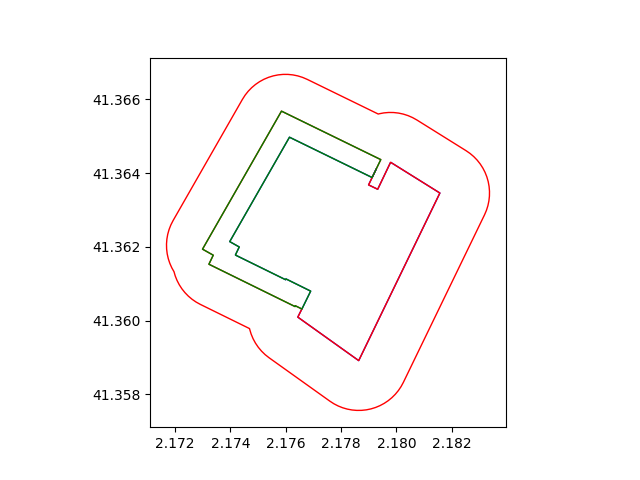

<AxesSubplot:>

In [25]:
fig, ax = plt.subplots()
dif_z1.plot(ax = ax, fc = 'none', ec = 'blue')
dif_z2.plot(ax = ax, fc = 'none', ec = 'red')
moll_buffer.plot(ax = ax, fc = 'none', ec = 'green')

In [26]:
g0=gpd.sjoin(gdfA_n2, moll_buffer)
g2=gpd.sjoin(gdfA_n2, dif_z2)
g1=gpd.sjoin(gdfA_n2, dif_z1)

In [27]:
gtot=g0.append(g1)
gtot1=gtot.append(g2)

In [28]:
gtot1=gtot1.sort_index()
gtot1=gtot1.drop(['index_right'], axis=1)

In [29]:
gdfA_n2_tot=gtot1
gdfA_n2_tot

,mmsi,lon,lat,shiptype,geometry,zone
0,247383500,2.17667,41.35834,74,POINT (2.17667 41.35834),2
1,247383500,2.17678,41.35849,74,POINT (2.17678 41.35849),2
2,247383500,2.17686,41.35864,74,POINT (2.17686 41.35864),2
3,247383500,2.17695,41.35878,74,POINT (2.17695 41.35878),2
4,247383500,2.17704,41.35892,74,POINT (2.17704 41.35892),2
...,...,...,...,...,...,...
57334,247243600,2.17676,41.35868,60,POINT (2.17676 41.35868),2
57335,247243600,2.17675,41.35865,60,POINT (2.17675 41.35865),2
57336,247243600,2.17672,41.35860,60,POINT (2.17672 41.35860),2
57337,247243600,2.17664,41.35848,60,POINT (2.17664 41.35848),2


SEND 'ZONE' INFO FROM GDFA TO DFA_N2

In [30]:
dfA_n2['zone']=gdfA_n2_tot['zone']

# (OPTIONAL) CHECK LIST OF 0s1s2s

In [28]:
gdfA_n2_tot['zone_shift']=gdfA_n2_tot['zone'].shift(1)
gdfA_n2_tot['calcul'] = gdfA_n2_tot['zone'] - gdfA_n2_tot['zone_shift']

In [29]:
gdfA_n2_tot.calcul.unique()

array([nan,  0., -1.,  1.,  2., -2.])

In [30]:
gdfA_n2_tot_lista = gdfA_n2_tot.loc[gdfA_n2_tot['calcul']!=0,:]

In [31]:
len(gdfA_n2_tot_lista)

297

<IPython.core.display.Javascript object>


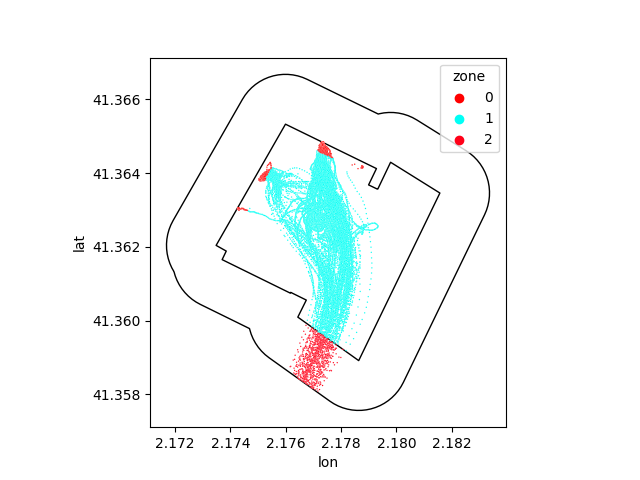

<AxesSubplot:xlabel='lon', ylabel='lat'>

In [32]:
fig, ax = plt.subplots()
dm_buffer_z2.plot(ax = ax, fc = 'none', ec = 'black')
dm_map.plot(ax = ax, fc = 'none', ec = 'black')
sns.scatterplot(data = gdfA_n2_tot, x = 'lon',y = 'lat', s = 1, hue = 'zone', palette = 'hsv')

# SAVE ORIGINAL DF WITH ZONE COLUMN

In [31]:
dfA_n2

,time_stamp,mmsi,status,turn,speed,lon,lat,course,heading,day,shipname,shiptype,draught,to_bow,to_stern,to_starboard,to_port,imo,zone
0,2022-06-01 01:03:59,247383500,0,-6.0,34.0,2.17667,41.35834,26.1,25.0,2022-06-01,ECO LIVORNO,74,6.6,116.0,122.0,27.0,7.0,9859557,2
1,2022-06-01 01:04:10,247383500,0,-7.0,33.0,2.17678,41.35849,25.9,25.0,2022-06-01,ECO LIVORNO,74,6.6,116.0,122.0,27.0,7.0,9859557,2
2,2022-06-01 01:04:20,247383500,0,-7.0,33.0,2.17686,41.35864,25.5,24.0,2022-06-01,ECO LIVORNO,74,6.6,116.0,122.0,27.0,7.0,9859557,2
3,2022-06-01 01:04:30,247383500,0,-8.0,33.0,2.17695,41.35878,25.3,24.0,2022-06-01,ECO LIVORNO,74,6.6,116.0,122.0,27.0,7.0,9859557,2
4,2022-06-01 01:04:40,247383500,0,-9.0,32.0,2.17704,41.35892,25.1,23.0,2022-06-01,ECO LIVORNO,74,6.6,116.0,122.0,27.0,7.0,9859557,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57334,2022-06-30 23:01:02,247243600,5,0.0,57.0,2.17676,41.35868,205.0,205.0,2022-06-30,CRUISE BARCELONA,60,7.2,43.0,211.0,15.0,15.0,9351488,2
57335,2022-06-30 23:01:03,247243600,5,0.0,57.0,2.17675,41.35865,203.9,205.0,2022-06-30,CRUISE BARCELONA,60,7.2,43.0,211.0,15.0,15.0,9351488,2
57336,2022-06-30 23:01:05,247243600,5,0.0,57.0,2.17672,41.35860,203.9,206.0,2022-06-30,CRUISE BARCELONA,60,7.2,43.0,211.0,15.0,15.0,9351488,2
57337,2022-06-30 23:01:10,247243600,5,0.0,59.0,2.17664,41.35848,205.0,206.0,2022-06-30,CRUISE BARCELONA,60,7.2,43.0,211.0,15.0,15.0,9351488,2


<IPython.core.display.Javascript object>


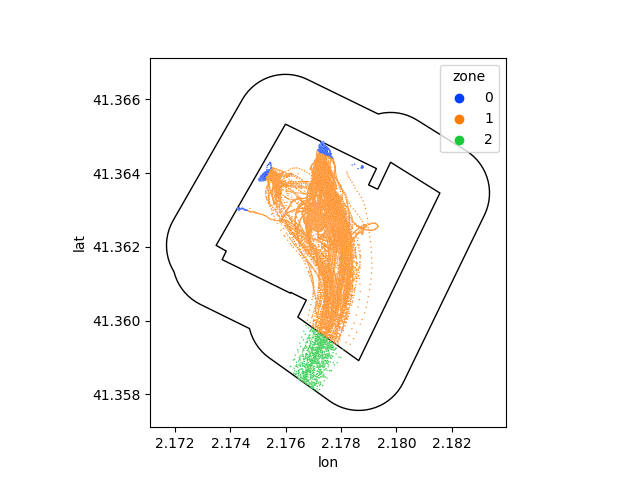

<AxesSubplot:xlabel='lon', ylabel='lat'>

In [36]:
fig, ax = plt.subplots()
dm_buffer_z2.plot(ax = ax, fc = 'none', ec = 'black')
dm_map.plot(ax = ax, fc = 'none', ec = 'black')
sns.scatterplot(data = dfA_n2, x = 'lon',y = 'lat', s = 1, hue = 'zone', palette = 'bright')

In [35]:
dfA_n2.to_csv(projPath_save +'_dfA_n2_zone.csv', index = False, columns = ['time_stamp','mmsi','status','turn','speed','lon','lat','course','heading', 'day','shipname','shiptype','draught','to_bow','to_stern', 'to_starboard','to_port', 'imo', 'zone'])